In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load data
df = pd.read_csv('weather_classification_data.csv')

In [3]:
# Split features and target
X = df.drop(['Weather Type'], axis=1)
y = df['Weather Type']

In [4]:
# Identify column types
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(exclude='number').columns.tolist()

In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

In [6]:
# Baseline Model
mode_class = y_train.mode()[0]
baseline_pred = [mode_class] * len(y_test)
baseline_acc = accuracy_score(y_test, baseline_pred)
results['Baseline'] = baseline_acc
print(f"Baseline Accuracy: {baseline_acc:.2f}")

Baseline Accuracy: 0.24


In [7]:
# KNN Model (with preprocessing)
knn_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
knn_pipe = Pipeline([
    ('preprocessor', knn_preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
knn_pipe.fit(X_train, y_train)
knn_acc = knn_pipe.score(X_test, y_test)
results['KNN'] = knn_acc
print(f"KNN Accuracy: {knn_acc:.2f}")


KNN Accuracy: 0.90


In [8]:
# Random Forest Model (with preprocessing)
rf_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
rf_pipe = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42))
])
rf_pipe.fit(X_train, y_train)
rf_acc = rf_pipe.score(X_test, y_test)
results['Random Forest'] = rf_acc
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Random Forest Accuracy: 0.91


In [9]:
# SVM Model (with preprocessing and grid search)
svm_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
svm_pipe = Pipeline([
    ('preprocessor', svm_preprocessor),
    ('svm', SVC())
])
svm_param_grid = {
    'svm__C': [6.5],
    'svm__kernel': ['rbf'],
    'svm__gamma': ['scale']
}
svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=3, n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_acc = svm_grid.score(X_test, y_test)
results['SVM'] = svm_acc
print(f"SVM Accuracy: {svm_acc:.2f}")

SVM Accuracy: 0.91


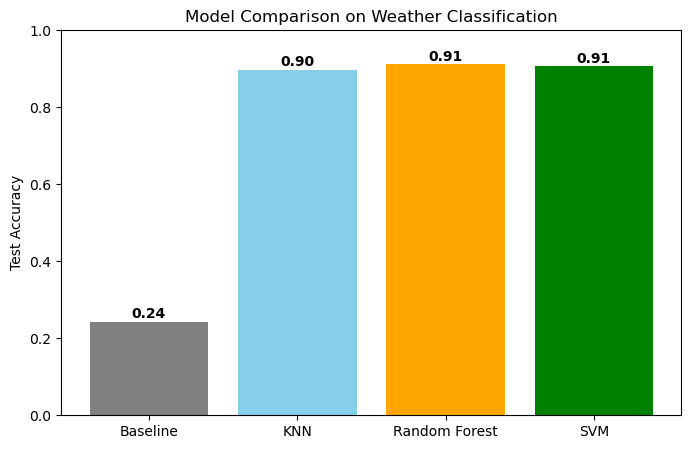

In [10]:
# Bar chart of results
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['gray', 'skyblue', 'orange', 'green'])
plt.ylabel('Test Accuracy')
plt.title('Model Comparison on Weather Classification')
plt.ylim(0, 1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

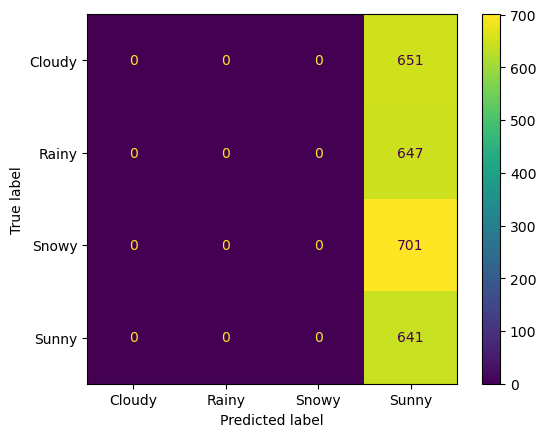

In [11]:
cm = confusion_matrix(y_test, baseline_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cloudy', 'Rainy','Snowy','Sunny'])
disp.plot()

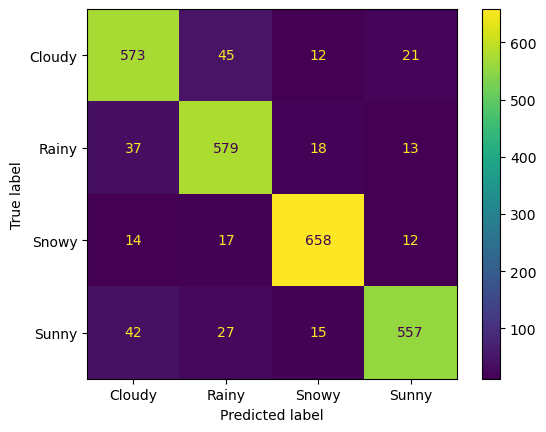

In [15]:
cm = confusion_matrix(y_test, knn_pipe.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cloudy', 'Rainy','Snowy','Sunny'])
disp.plot()

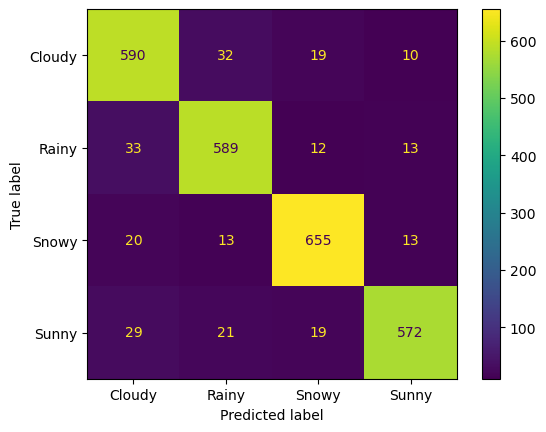

In [16]:
cm = confusion_matrix(y_test, rf_pipe.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cloudy', 'Rainy','Snowy','Sunny'])
disp.plot()

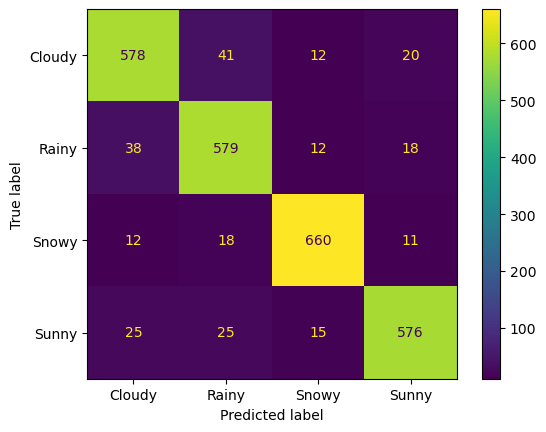

In [17]:
cm = confusion_matrix(y_test, svm_grid.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cloudy', 'Rainy','Snowy','Sunny'])
disp.plot()

In [12]:
df = pd.read_csv('live_weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,27.777778,79,4.62,0,partly cloudy,1014,0.0000,Spring,10.0,coastal,Cloudy
1,27.777778,77,4.32,0,partly cloudy,1014,0.3033,Spring,10.0,coastal,Sunny
2,27.222222,74,4.20,0,partly cloudy,1014,1.3210,Spring,10.0,coastal,Sunny
3,26.666667,72,3.95,0,partly cloudy,1015,3.2487,Spring,10.0,coastal,Sunny
4,25.555556,76,4.01,0,clear,1014,6.0570,Spring,10.0,coastal,Sunny


In [13]:
# Split features and target
X = df.drop(['Weather Type'], axis=1)
y = df['Weather Type']



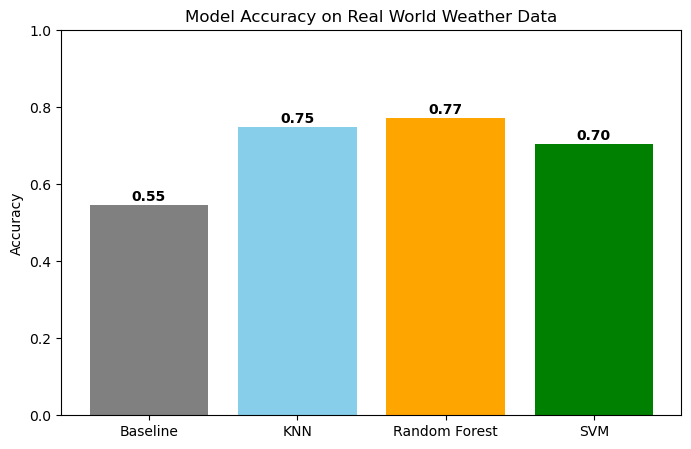

In [14]:
from sklearn.metrics import accuracy_score

# Baseline Model
mode_class_real = y.mode()[0]
baseline_pred_real = [mode_class_real] * len(y)


# Apply trained models to the real world data in X
knn_pred_real = knn_pipe.predict(X)
rf_pred_real = rf_pipe.predict(X)
# Predict with SVM
svm_pred_real = svm_grid.predict(X)

# Calculate accuracy for each model
baseline_acc_real = accuracy_score(y, baseline_pred_real)
knn_acc_real = accuracy_score(y, knn_pred_real)
rf_acc_real = accuracy_score(y, rf_pred_real)
svm_acc_real = accuracy_score(y, svm_pred_real)

# Show bar chart
model_names = ['Baseline', 'KNN', 'Random Forest', 'SVM']
accuracies = [baseline_acc_real, knn_acc_real, rf_acc_real, svm_acc_real]
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['gray', 'skyblue', 'orange', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Real World Weather Data')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

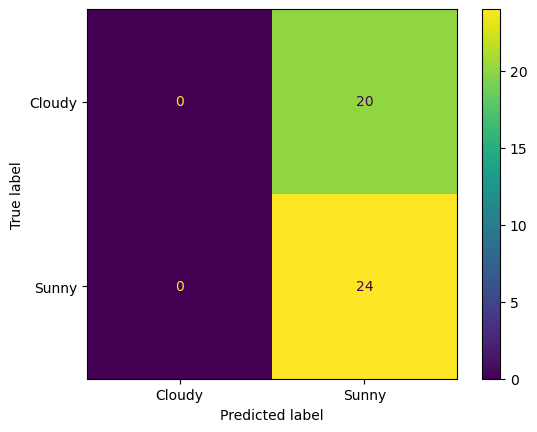

In [23]:
cm = confusion_matrix(y, baseline_pred_real)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cloudy', 'Sunny'])
disp.plot()

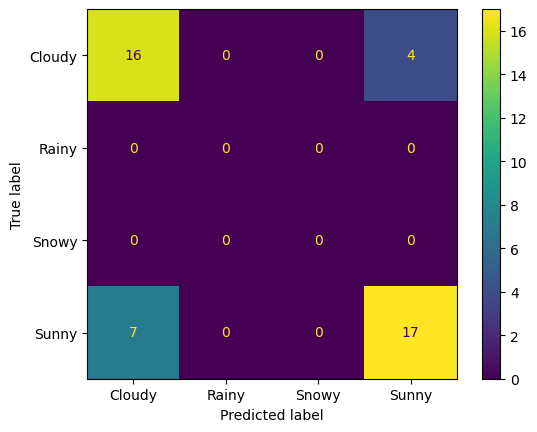

In [20]:
labels = knn_pipe.classes_
cm = confusion_matrix(y, knn_pred_real, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

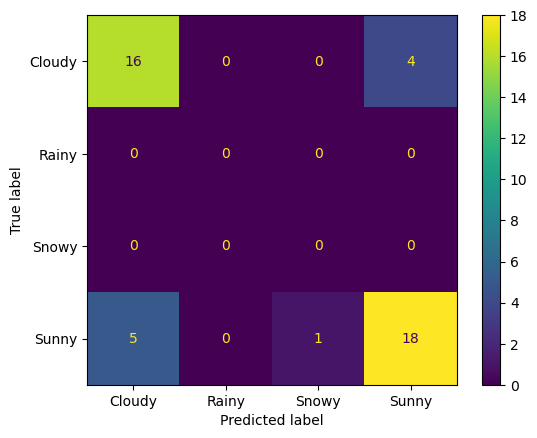

In [21]:
labels = rf_pipe.classes_
cm = confusion_matrix(y, rf_pred_real, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

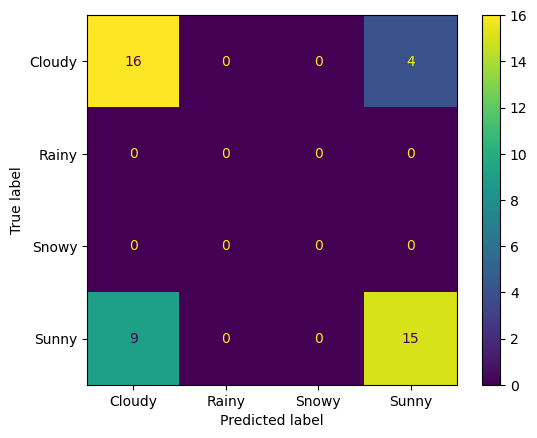

In [22]:
labels = svm_grid.classes_
cm = confusion_matrix(y, svm_pred_real, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()